# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yingf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8916


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Justine Calma',
 'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
 'description': 'ExxonMobil and other fossil fuel companies have turned to Bitcoin mining to address a gas problem. But their plans come with risks.',
 'url': 'https://www.theverge.com/2022/5/4/23055761/exxonmobil-cryptomining-bitcoin-methane-gas',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/BZdljrBbt8tBl6oCCnckcDKqe6g=/0x90:4608x2503/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23435975/1240300988.jpg',
 'publishedAt': '2022-05-04T12:00:00Z',
 'content': 'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]'}

In [7]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 4833


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Emma Roth',
 'title': 'US blames North Korean hacker group for $625 million Axie Infinity theft',
 'description': 'The US Department of Treasury has attributed the $625 Axie Infinity theft to Lazarus, a North Korean hacking group with ties to the country’s intelligence agency.',
 'url': 'https://www.theverge.com/2022/4/14/23025739/north-korean-hacker-lazarus-axie-infinity-cryptocurrency-hack-theft-us-blames',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/n8TGCqcud7UHPIbtgxLi10Owa5I=/0x52:1018x585/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23374959/Screen_Shot_2022_03_30_at_10.10.00_AM.png',
 'publishedAt': '2022-04-14T21:43:57Z',
 'content': 'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]'}

In [8]:
# Download/Update teh VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yingf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiment.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
        })

    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame Columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
1,2022-04-08,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
4,2022-04-05,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []
for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiment.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
        })

    except AttributeError:
        pass

# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame Columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.144785,0.065010,0.032120,0.90289
std,0.375992,0.073689,0.055548,0.09334
min,-0.872000,0.000000,0.000000,0.56700
25%,0.000000,0.000000,0.000000,0.85600
50%,0.000000,0.057000,0.000000,0.91900
75%,0.411525,0.097500,0.063500,1.00000
max,0.952000,0.378000,0.329000,1.00000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.191045,0.087480,0.03816,0.874360
std,0.408168,0.090586,0.04867,0.097658
min,-0.784500,0.000000,0.00000,0.594000
25%,-0.153100,0.000000,0.00000,0.812750
50%,0.215150,0.072000,0.00000,0.897500
75%,0.498075,0.134250,0.06375,0.938500
max,0.952000,0.378000,0.23300,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score which was 0.08748, while it was 0.06501 for Bitcoin.

Q: Which coin had the highest compound score?

A: Ethereum had the highest mean compound score which was 0.191045, while it was 0.144785 for Bitcoin. Both Bitcoin and Ethereum's max compound scores were 0.952.

Q. Which coin had the highest positive score?

A: Ethereum and Bitcoin had the same max positive score which was 0.378.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'someone', 'somthing','since', 'also','too'}

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
1,2022-04-08,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919,"[set, open, later, yearif, buy, something, ver..."
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
4,2022-04-05,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943,"[might, heard, crypto, twitter, corner, social..."


In [17]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[us, department, treasury, say, lazarus, behin..."
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[poster, participating, including, story, auth..."
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, crypto, browser, ..."
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# convert bitcoin text list of strings to one big string
bitcoin_text = ' '.join(bitcoin_df['text'])

# create tokenized list of the words
bitcoin_processed = tokenizer(bitcoin_text)

# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
bitcoin_ngrams.most_common(10)

[(('april', 'reuters'), 19),
 (('char', 'april'), 6),
 (('may', 'reuters'), 6),
 (('bitcoin', 'conference'), 5),
 (('warren', 'buffett'), 4),
 (('cash', 'app'), 4),
 (('central', 'african'), 4),
 (('char', 'london'), 4),
 (('char', 'new'), 4),
 (('wikipedia', 'editor'), 3)]

In [20]:
# convert Ethereum text list of strings to one big string
ethereum_text = ' '.join(ethereum_df['text'])

# create tokenized list of the words
ethereum_processed = tokenizer(ethereum_text)

# Generate the Bitcoin N-grams where N=2
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
ethereum_ngrams.most_common(10)

[(('april', 'reuters'), 8),
 (('char', 'april'), 7),
 (('north', 'korean'), 6),
 (('yacht', 'club'), 5),
 (('five', 'year'), 5),
 (('char', 'us'), 5),
 (('last', 'week'), 4),
 (('axie', 'infinity'), 4),
 (('bloomberg', 'intelligence'), 4),
 (('us', 'treasury'), 3)]

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = token_count(bitcoin_processed)
bitcoin_top_10

[('char', 96),
 ('bitcoin', 48),
 ('reuters', 29),
 ('april', 23),
 ('ha', 22),
 ('cryptocurrency', 21),
 ('crypto', 16),
 ('world', 16),
 ('cryptocurrencies', 14),
 ('may', 12)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = token_count(ethereum_processed)
ethereum_top_10

[('char', 100),
 ('ha', 27),
 ('cryptocurrency', 24),
 ('ethereum', 22),
 ('crypto', 18),
 ('year', 15),
 ('week', 15),
 ('us', 13),
 ('wa', 13),
 ('april', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

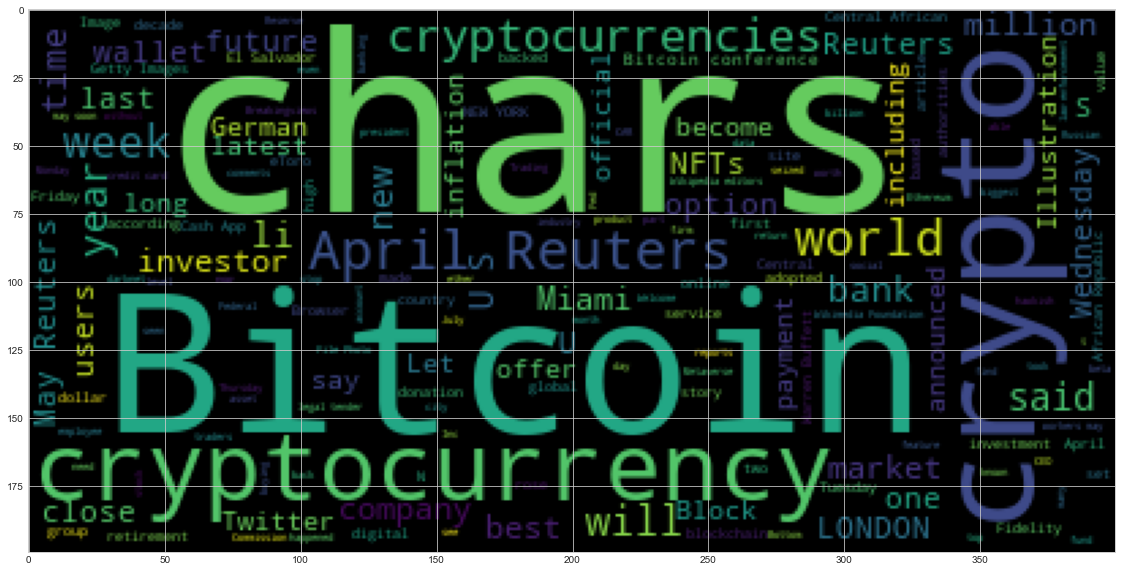

In [38]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(bitcoin_text)
plt.imshow(bitcoin_wc)
plt.savefig('btc-word-cloud.png')

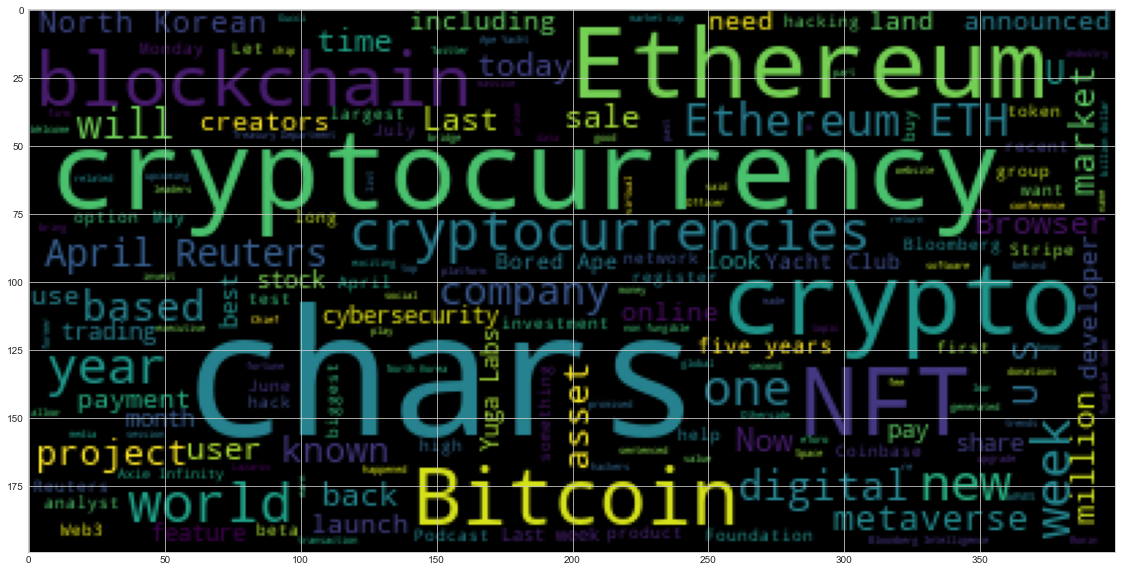

In [39]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_text)
plt.imshow(ethereum_wc)
plt.savefig('eth-word-cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
# Already get bitcoin_text on previous steps. 

In [31]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [33]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
later this year DATE
Verge PRODUCT
Vox ORG
Alex Castro PERSON
Blockstream ORG
Wikipedia ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Warren Buffett PERSON
the weekend DATE
Twitter PERSON
Twitter ORG
Jack Dorsey’s PERSON
German NORP
$25.2 million MONEY
USD ORG
Bitcoin ORG
German NORP
Russian NORP
Hydra PERSON
23 million CARDINAL
Last week DATE
Fidelity Investments ORG
April 12 DATE
Reuters ORG
$10 billion MONEY
MIAMI BEACH GPE
April 7 DATE
Reuters ORG
Samson Mow PERSON
Thursday DATE
Jan3 ORG
Block GPE
Jack Dorsey PERSON
three CARDINAL
Thursday DATE
CoinDesk PRODUCT
Cash App PERSON
18 CARDINAL
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
+4016 NORP
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY


---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
# Already get bitcoin_text on previous steps.

In [35]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [37]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

The US Department of Treasury ORG
The US Treasury Department ORG
North Korean NORP
$625 million MONEY
Ronin PERSON
18 CARDINAL
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Opera ORG
Crypto Browser WORK_OF_ART
January DATE
Windows, Mac ORG
Android ORG
Ethereum ORG
Yuga Labs PERSON
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
+6669 ORDINAL
April 5 DATE
Reuters ORG
Boba Network PERSON
$45 million MONEY
Will Smith PERSON
Dreamers VC PERSON
Paris Hilton ORG
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
April 26 DATE
Reuters ORG
No.2 CARDINAL
second ORDINAL
The Brave Browser WORK_OF_ART
Chrome ORG
Brave ORG
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Last night TIME
Bloomberg GPE
nearly a third CARDINAL
a billion dollars MONEY
Early this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
One CARDINAL
Ethereum ORG
Merge PERSON
a few months after June DA

---